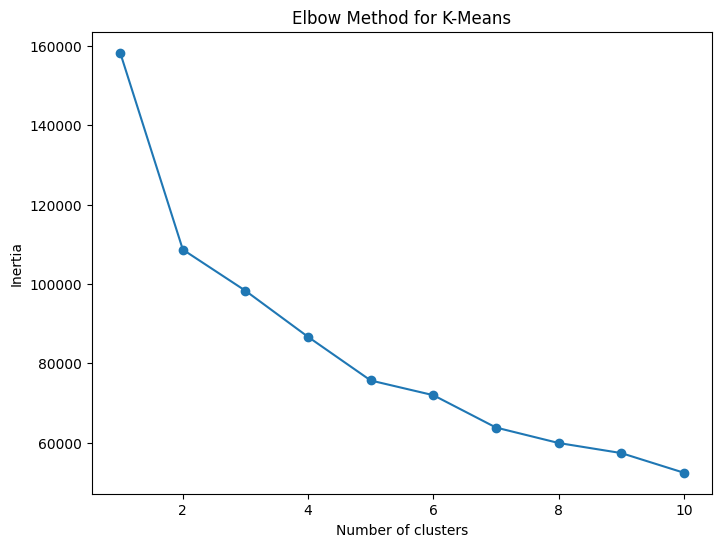

Silhouette KMeans: 0.3336517041041939
Calinski-Harabasz KMeans: 2194.5782371896794
Davies-Bouldin KMeans: 1.2655388064008637
Silhouette DBSCAN: -0.22711928007284996
Calinski-Harabasz DBSCAN: 15.308950645279376
Davies-Bouldin DBSCAN: 1.7753924402388312


In [4]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
import matplotlib.pyplot as plt

# Load dataset
file_path = 'clusteringweek06.csv'  # Update with the correct path
data = pd.read_csv(file_path)

# Preprocessing
numerical_columns = data.columns
data_scaled = StandardScaler().fit_transform(data)

# Apply K-Means clustering with different numbers of clusters (for Elbow Method)
kmeans_inertia = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    kmeans_inertia.append(kmeans.inertia_)

# Plot Elbow method
plt.figure(figsize=(8, 6))
plt.plot(k_range, kmeans_inertia, marker='o')
plt.title("Elbow Method for K-Means")
plt.xlabel("Number of clusters")
plt.ylabel("Inertia")
plt.show()

# Apply K-Means with the chosen number of clusters (for example, 3 clusters)
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(data_scaled)

# Apply DBSCAN clustering (optional)
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(data_scaled)

# Evaluate K-Means using Silhouette Score, Calinski-Harabasz, and Davies-Bouldin Index
silhouette_kmeans = silhouette_score(data_scaled, kmeans_labels)
calinski_kmeans = calinski_harabasz_score(data_scaled, kmeans_labels)
davies_kmeans = davies_bouldin_score(data_scaled, kmeans_labels)

# Evaluate DBSCAN only if it has more than one cluster
silhouette_dbscan = None
calinski_dbscan = None
davies_dbscan = None

# Check if DBSCAN has more than 1 label
if len(set(dbscan_labels)) > 1:
    silhouette_dbscan = silhouette_score(data_scaled, dbscan_labels)
    calinski_dbscan = calinski_harabasz_score(data_scaled, dbscan_labels)
    davies_dbscan = davies_bouldin_score(data_scaled, dbscan_labels)

# Print Evaluation Results
evaluation_results = {
    "Silhouette KMeans": silhouette_kmeans,
    "Calinski-Harabasz KMeans": calinski_kmeans,
    "Davies-Bouldin KMeans": davies_kmeans,
    "Silhouette DBSCAN": silhouette_dbscan,
    "Calinski-Harabasz DBSCAN": calinski_dbscan,
    "Davies-Bouldin DBSCAN": davies_dbscan
}

for metric, value in evaluation_results.items():
    print(f"{metric}: {value}")
